In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
startups =  pd.read_csv(r"C:\Users\LENOVO\Downloads\startup_funding.csv")
df= startups.copy()

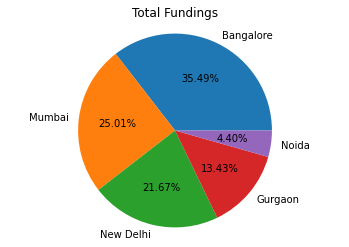

Bangalore 637


In [5]:
df.CityLocation.fillna("None", inplace = True)
# df.CityLocation.dropna("None", inplace = True)
df.CityLocation.replace("bangalore", "Bangalore", inplace = True)
df.CityLocation.replace("Delhi", "New Delhi", inplace = True)
given_cities = ["Bangalore", "New Delhi", "Gurgaon", "Mumbai", "Noida"]
def func(s):
    s = str(s)
    if s != "":
        list =  s.split("/")
        for i in range(len(list)):
            if list[i].strip() in given_cities:
                return list[i].strip()

df["CityLocation"] = df["CityLocation"].apply(func)
maximum_fundings = df.CityLocation.value_counts()
labels = maximum_fundings.index
count = maximum_fundings.values
plt.pie(count, labels = labels, autopct = "%0.2f%%")
plt.title("Total Fundings")
plt.axis("equal")
plt.show()
print(maximum_fundings.index[0], maximum_fundings.values[0])




Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


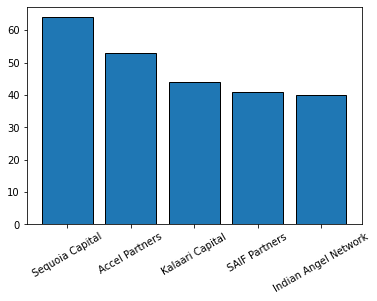

In [11]:
data_file = startups.copy()

# drop that rows where "InvestorsName" has nan values
index=data_file[data_file["InvestorsName"].isna()].index
data_file.drop(index,inplace=True)

# count the how many time which investor invest and store in dictionary investor_count
def investors_names(arr):
    d={}
    for i in arr:
        if ',' not in i:
            d[i]=d.get(i,0)+1
        else:
            string=i.strip().split(',')
            for j in string:
                d[j.strip()]=d.get(j.strip(),0)+1
    return d
investor_count=investors_names(data_file['InvestorsName'])

# construct a dataframe from investor_count and store in investor_names_count
investor_names_count=pd.DataFrame(list(investor_count.values()),list(investor_count.keys()))

# sort values of investor_names_count in ascending order
investor_names_count=investor_names_count.sort_values(by=0,ascending=False)
# print top 5 investors
for i in range(5):
    print(investor_names_count.index[i],investor_names_count.values[i][0])
    
index=investor_names_count.index[0:5]
values=[]
for i in range(5):
    values.append(investor_names_count.values[i][0])
plt.bar(index,values,edgecolor="black")
plt.xticks(rotation=30)
plt.show()

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


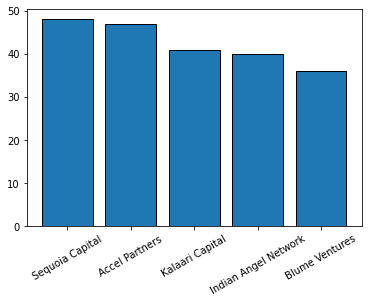

In [15]:
data_file=startups.copy()

# drop that rows where "InvestorsName" has nan values ans then reset the index
index=data_file[data_file["InvestorsName"].isna()].index
data_file.drop(index,inplace=True)
data_file=data_file.reset_index(drop=True)

# Correcting the errors in startup names of important startups Ola,Oyo,Flipkart,Paytm
# by replace the error name with correct name
data_file['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data_file['StartupName'].replace('Olacabs','Ola',inplace=True)
data_file['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data_file['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data_file['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data_file['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

# Count the how many times investors invest in different companies
def investor_startup(arr1,arr2):
    d={}
    l=[]
    for i in range(len(arr1)):
        if ',' not in arr1[i]:
            if (arr1[i],arr2[i]) not in l:
                d[arr1[i]]=d.get(arr1[i],0)+1
                l.append((arr1[i],arr2[i]))
        else:
            string=arr1[i].strip().split(',')
            for j in string:
                if (j.strip(),arr2[i]) not in l and j.strip()!='':
                    d[j.strip()]=d.get(j.strip(),0)+1
                    l.append((j.strip(),arr2[i]))
    return d
investor_startup_count=investor_startup(data_file['InvestorsName'],data_file["StartupName"])

# Construct a Dataframe of keys and values of invester_startups_count and store in 'df'
df=pd.DataFrame(list(investor_startup_count.values()),list(investor_startup_count.keys()))

# Sort value of investors in descending order and store in 'top_investors'
top_investors=df.sort_values(by=0,ascending=False)

# print top 5 investors
for i in range(5):
    print(top_investors.index[i],top_investors.values[i][0])
index=top_investors.index[0:5]
values=[]
for i in range(5):
    values.append(top_investors.values[i][0])
plt.bar(index,values,edgecolor="black")
plt.xticks(rotation=30)
plt.show()

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


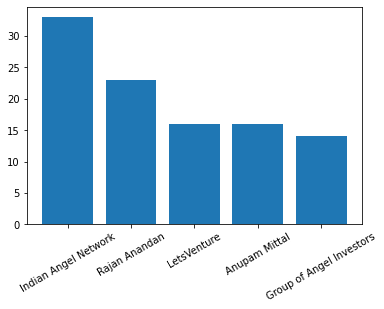

In [17]:
data_file=startups.copy()

# Correcting the errors in 'InvestmentType' 
data_file['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data_file['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data_file['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

# Correcting the errors in startup names of important startups Ola,Oyo,Flipkart,Paytm
# by replace the error name with correct name
data_file['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data_file['StartupName'].replace('Olacabs','Ola',inplace=True)
data_file['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data_file['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data_file['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data_file['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

# drop that rows where "InvestorsName" have nan values or undisclosed investors.
# or "InvestmentType" has nan values
index=data_file[(data_file["InvestorsName"].isna()) 
               | (data_file["InvestmentType"].isna())
               |(data_file["InvestorsName"]=="Undisclosed Investors")
               |(data_file["InvestorsName"]=="Undisclosed investors")].index
data_file.drop(index,inplace=True)

# select that row where "InvestmentType" is crowd Funding or Seed Funding
data_file=data_file[(data_file["InvestmentType"]=="Crowd Funding") 
                    | (data_file["InvestmentType"]=="Seed Funding")]

# Reset the index
data_file=data_file.reset_index(drop=True)

# Count the how many times investors invest in different companies
def investor_startup(arr1,arr2):
    d={}
    l=[]
    for i in range(len(arr1)):
        if ',' not in arr1[i]:
            if (arr1[i],arr2[i]) not in l:
                d[arr1[i]]=d.get(arr1[i],0)+1
                l.append((arr1[i],arr2[i]))
        else:
            string=arr1[i].strip().split(',')
            for j in string:
                if (j.strip(),arr2[i]) not in l and j.strip()!='':
                    d[j.strip()]=d.get(j.strip(),0)+1
                    l.append((j.strip(),arr2[i]))
    return d
investor_startup_count=investor_startup(data_file['InvestorsName'],data_file["StartupName"])

# Construct a Dataframe of keys and values of invester_startups_count and store in 'df'
df=pd.DataFrame(list(investor_startup_count.values()),list(investor_startup_count.keys()))

# Sort value of investors in descending order and store in 'top_investors'
top_investors=df.sort_values(by=0,ascending=False)

# print top 5 investors and how many times they invest
for i in range(5):
    print(top_investors.index[i],top_investors.values[i][0])
index=top_investors.index[0:5]
values=[]
for i in range(5):
    values.append(top_investors.values[i][0])
plt.bar(index,values)
plt.xticks(rotation=30)
plt.show()

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


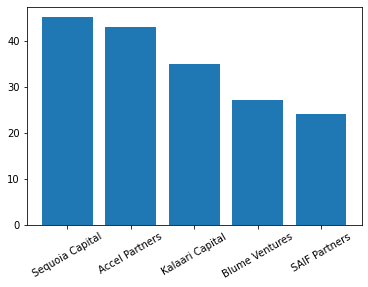

In [19]:
data_file=startups.copy()

# Correcting the errors in 'InvestmentType' 
data_file['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data_file['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data_file['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

# Correcting the errors in startup names of important startups Ola,Oyo,Flipkart,Paytm
# by replace the error name with correct name
data_file['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data_file['StartupName'].replace('Olacabs','Ola',inplace=True)
data_file['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data_file['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data_file['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data_file['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data_file['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

# drop that rows where "InvestorsName" have nan values or undisclosed investors.
# or "InvestmentType" has nan values
index=data_file[(data_file["InvestorsName"].isna()) 
               | (data_file["InvestmentType"].isna())
               |(data_file["InvestorsName"]=="Undisclosed Investors")
               |(data_file["InvestorsName"]=="Undisclosed investors")].index
data_file.drop(index,inplace=True)

# select that row where "InvestmentType" is Private Equity
data_file=data_file[(data_file["InvestmentType"]=="Private Equity") ]

# Reset the index
data_file=data_file.reset_index(drop=True)

# Count the how many times investors invest in different companies
def investor_startup(arr1,arr2):
    d={}
    l=[]
    for i in range(len(arr1)):
        if ',' not in arr1[i]:
            if (arr1[i],arr2[i]) not in l:
                d[arr1[i]]=d.get(arr1[i],0)+1
                l.append((arr1[i],arr2[i]))
        else:
            string=arr1[i].strip().split(',')
            for j in string:
                if (j.strip(),arr2[i]) not in l and j.strip()!='':
                    d[j.strip()]=d.get(j.strip(),0)+1
                    l.append((j.strip(),arr2[i]))
    return d
investor_startup_count=investor_startup(data_file['InvestorsName'],data_file["StartupName"])

# Construct a Dataframe of keys and values of invester_startups_count and store in 'df'
df=pd.DataFrame(list(investor_startup_count.values()),list(investor_startup_count.keys()))

# Sort value of investors in descending order and store in 'top_investors'
top_investors=df.sort_values(by=0,ascending=False)

# print top 5 investors and how many times they invest
for i in range(5):
    print(top_investors.index[i],top_investors.values[i][0])
index=top_investors.index[0:5]
values=[]
for i in range(5):
    values.append(top_investors.values[i][0])
plt.bar(index,values)
plt.xticks(rotation=30)
plt.show()